# Yolo inference with heat map generation
## Imports

In [1]:
import os
import cv2
import random
import numpy as np
from datetime import datetime
from CellDetector import CellDetector
import matplotlib.pyplot as plt
%matplotlib inline

## Load model

In [2]:
cell_detector = CellDetector("02_23_all_data_ft.pt")

## Load data

In [3]:
DEATH_TYPE = "Necroptosis"
CELL_TYPE = "HT29"
base_dir = "../Test Data/" + DEATH_TYPE + "/"
images_dir = base_dir + "HT29_Phase/"
green_dir = base_dir + "HT29_Green/"
images = os.listdir(images_dir)
len_images = len(images)

In [4]:
image_id = random.randrange(len_images)
print(image_id)
source = images_dir + images[image_id]
source_green = green_dir + images[image_id]
print(source)

img = cv2.imread(source, cv2.IMREAD_UNCHANGED)

img_green = cv2.imread(source_green, cv2.IMREAD_UNCHANGED)
img_green = cv2.convertScaleAbs(img_green, alpha=(255.0/65535.0))
img_green = cv2.addWeighted(img_green, 8.7, np.zeros(img_green.shape, img_green.dtype), 0, 0.0)

55
../Test Data/Necroptosis/HT29_Phase/VID834_C5_1_00d04h00m.png


## Predict

#### Heat map

In [5]:
apoptosis_image, necroptosis_image, background_image = cell_detector.predict_with_heatmap(img, 0.2, 0.4, desired_coverage = 10)

Random Croping
Total random crops to execute: 1316

0: 128x128 (no detections), 8.7ms
Speed: 1.8ms preprocess, 8.7ms inference, 38.6ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 (no detections), 10.0ms
Speed: 0.7ms preprocess, 10.0ms inference, 0.6ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 (no detections), 10.8ms
Speed: 0.7ms preprocess, 10.8ms inference, 0.6ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 (no detections), 10.8ms
Speed: 0.7ms preprocess, 10.8ms inference, 1.2ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 (no detections), 11.9ms
Speed: 0.6ms preprocess, 11.9ms inference, 0.6ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 (no detections), 13.1ms
Speed: 0.6ms preprocess, 13.1ms inference, 0.7ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 (no detections), 13.7ms
Speed: 0.7ms preprocess, 13.7ms inference, 0.7ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 (no det

#### Boxes

In [6]:
results, big_image = cell_detector.predict_with_crop(img, 0.2, 0.4, withImage = True)


0: 128x128 (no detections), 16.3ms
Speed: 0.6ms preprocess, 16.3ms inference, 0.9ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 2 necroptosiss, 16.3ms
Speed: 0.7ms preprocess, 16.3ms inference, 1.8ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 (no detections), 16.0ms
Speed: 0.8ms preprocess, 16.0ms inference, 1.0ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 (no detections), 16.3ms
Speed: 0.7ms preprocess, 16.3ms inference, 0.8ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 (no detections), 16.5ms
Speed: 1.2ms preprocess, 16.5ms inference, 0.9ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 (no detections), 17.1ms
Speed: 0.8ms preprocess, 17.1ms inference, 0.9ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 (no detections), 18.1ms
Speed: 0.9ms preprocess, 18.1ms inference, 0.8ms postprocess per image at shape (1, 3, 128, 128)

0: 128x128 (no detections), 13.9ms
Speed: 0.7ms preprocess, 13.9ms in

## Visualize

### Compare

In [7]:
amax = apoptosis_image.max()
amin = apoptosis_image.min()
print("Apoptosis")
print(amax)
print(amin)
nmax = necroptosis_image.max()
nmin = necroptosis_image.min()
print("Necroptosis")
print(nmax)
print(nmin)
bmax = background_image.max()
bmin = background_image.min()
print("Background")
print(bmax)
print(bmin)

Apoptosis
0.2827
0.0


Necroptosis
0.3677
0.0
Background
1.0
0.0


In [8]:
IF_GREEN = True

if IF_GREEN:
    image_boxed, image_green_boxed = cell_detector.box_image(big_image, results, image_green = img_green, prepare_type = 0)
else:
    image_boxed = cell_detector.box_image(big_image, results)

Text(0.5, 1.0, 'Necroptosis')

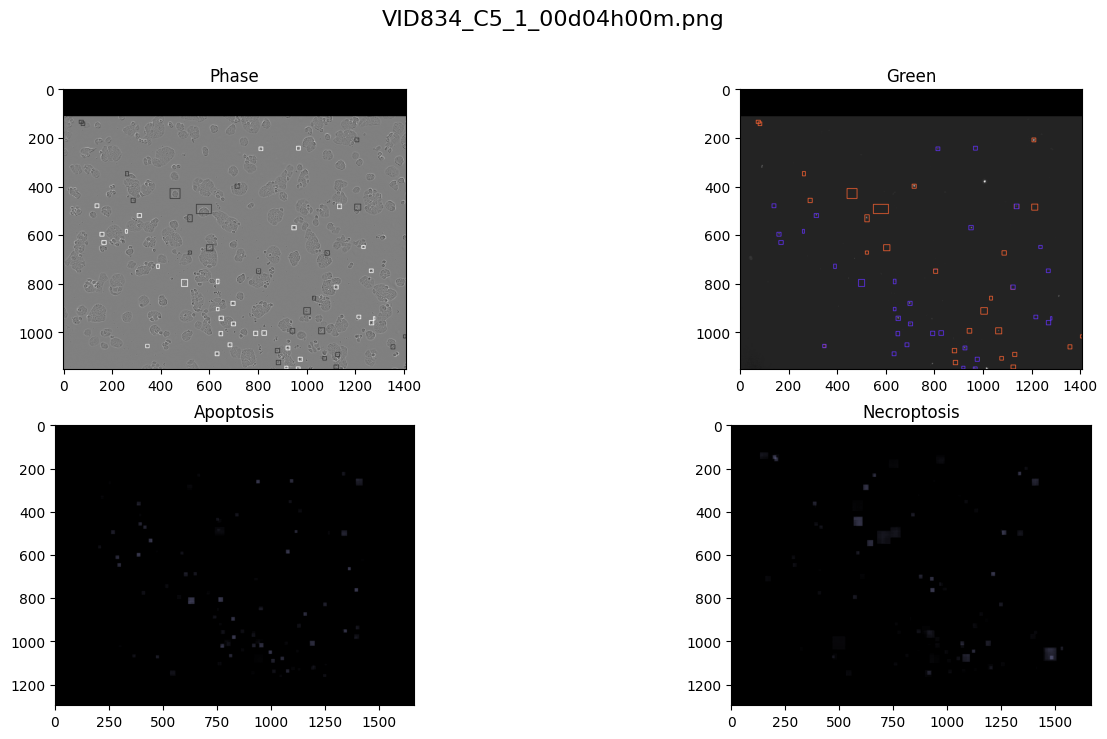

In [9]:
fig, ((ax1, ax2),(ax3, ax4)) = plt.subplots(nrows=2,ncols=2,figsize=(16,8))
fig.suptitle(str(images[image_id]), fontsize=16)

image_boxed = cv2.cvtColor(image_boxed, cv2.COLOR_BGR2RGB)

image_green_boxed = cv2.cvtColor(image_green_boxed, cv2.COLOR_BGR2RGB)


ax1.imshow(image_boxed)
ax1.set_title("Phase")

ax2.imshow(image_green_boxed)
ax2.set_title("Green")

ax3.imshow(apoptosis_image, vmin=0.0, vmax=1.0, cmap='bone')
ax3.set_title("Apoptosis")

ax4.imshow(necroptosis_image, vmin=0.0, vmax=1.0, cmap='bone')
ax4.set_title("Necroptosis")